## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.113035  1.252588  1.010707 -0.368931  1.179014  1.035234
1  1.397497  0.848936 -0.392688  1.192843  1.030434  1.340546
2  1.602183  1.525231 -1.693747  0.699898  0.670046  0.757055
3 -0.368995 -0.245316  1.175555 -0.498509  0.512116 -0.081864
4  1.002333  0.958569  0.517879  0.820215 -0.916125  0.767870


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0079371	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9983413	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9880889	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9777849	total: 59ms	remaining: 14.7s
4:	learn: 0.9683758	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9584290	total: 60.4ms	remaining: 10s
6:	learn: 0.9465554	total: 61.7ms	remaining: 8.75s
7:	learn: 0.9350950	total: 62.2ms	remaining: 7.71s
8:	learn: 0.9261482	total: 62.7ms	remaining: 6.91s
9:	learn: 0.9171164	total: 63.5ms	remaining: 6.28s
10:	learn: 0.9088693	total: 64.2ms	remaining: 5.77s
11:	learn: 0.8980408	total: 64.7ms	remaining: 5.33s
12:	learn: 0.8886247	total: 65.2ms	remaining: 4.95s
13:	learn: 0.8795631	total: 65.7ms	remaining: 4.63s
14:	learn: 0.8714184	total: 66.2ms	remaining: 4.34s
15:	learn: 0.8624512	total: 66.6ms	remaining: 4.09s
16:	learn: 0.8545692	total: 67.2ms	remaining: 3.89s
17:	learn: 0.8474490	total: 67.8ms	remaining: 3.7s
18:	learn: 0.8375061	total: 68.2ms	remaining: 3.5

85:	learn: 0.4479397	total: 108ms	remaining: 1.15s
86:	learn: 0.4447761	total: 109ms	remaining: 1.14s
87:	learn: 0.4414721	total: 109ms	remaining: 1.13s
88:	learn: 0.4380186	total: 110ms	remaining: 1.12s
89:	learn: 0.4343157	total: 110ms	remaining: 1.11s
90:	learn: 0.4306496	total: 111ms	remaining: 1.1s
91:	learn: 0.4270956	total: 111ms	remaining: 1.1s
92:	learn: 0.4232350	total: 112ms	remaining: 1.09s
93:	learn: 0.4194406	total: 112ms	remaining: 1.08s
94:	learn: 0.4158810	total: 112ms	remaining: 1.07s
95:	learn: 0.4124539	total: 113ms	remaining: 1.06s
96:	learn: 0.4088773	total: 114ms	remaining: 1.06s
97:	learn: 0.4056509	total: 115ms	remaining: 1.05s
98:	learn: 0.4018269	total: 115ms	remaining: 1.05s
99:	learn: 0.3983825	total: 117ms	remaining: 1.05s
100:	learn: 0.3956223	total: 117ms	remaining: 1.04s
101:	learn: 0.3925671	total: 118ms	remaining: 1.04s
102:	learn: 0.3892448	total: 119ms	remaining: 1.03s
103:	learn: 0.3858525	total: 121ms	remaining: 1.04s
104:	learn: 0.3827206	total: 

209:	learn: 0.1732973	total: 190ms	remaining: 714ms
210:	learn: 0.1722033	total: 190ms	remaining: 712ms
211:	learn: 0.1713864	total: 191ms	remaining: 709ms
212:	learn: 0.1702889	total: 191ms	remaining: 707ms
213:	learn: 0.1688756	total: 192ms	remaining: 707ms
214:	learn: 0.1679069	total: 193ms	remaining: 704ms
215:	learn: 0.1668542	total: 194ms	remaining: 705ms
216:	learn: 0.1659012	total: 195ms	remaining: 702ms
217:	learn: 0.1649172	total: 195ms	remaining: 701ms
218:	learn: 0.1637257	total: 196ms	remaining: 699ms
219:	learn: 0.1626315	total: 198ms	remaining: 702ms
220:	learn: 0.1616352	total: 199ms	remaining: 700ms
221:	learn: 0.1604104	total: 199ms	remaining: 698ms
222:	learn: 0.1594145	total: 200ms	remaining: 697ms
223:	learn: 0.1581738	total: 201ms	remaining: 695ms
224:	learn: 0.1571260	total: 201ms	remaining: 693ms
225:	learn: 0.1561563	total: 201ms	remaining: 690ms
226:	learn: 0.1552294	total: 202ms	remaining: 687ms
227:	learn: 0.1540725	total: 202ms	remaining: 684ms
228:	learn: 

366:	learn: 0.0654122	total: 296ms	remaining: 511ms
367:	learn: 0.0649694	total: 297ms	remaining: 510ms
368:	learn: 0.0647523	total: 297ms	remaining: 508ms
369:	learn: 0.0643676	total: 298ms	remaining: 507ms
370:	learn: 0.0640078	total: 298ms	remaining: 506ms
371:	learn: 0.0636551	total: 299ms	remaining: 505ms
372:	learn: 0.0632949	total: 300ms	remaining: 504ms
373:	learn: 0.0629521	total: 300ms	remaining: 503ms
374:	learn: 0.0627485	total: 301ms	remaining: 501ms
375:	learn: 0.0623764	total: 301ms	remaining: 500ms
376:	learn: 0.0620121	total: 302ms	remaining: 498ms
377:	learn: 0.0616638	total: 302ms	remaining: 497ms
378:	learn: 0.0612467	total: 304ms	remaining: 498ms
379:	learn: 0.0610514	total: 304ms	remaining: 496ms
380:	learn: 0.0607618	total: 305ms	remaining: 495ms
381:	learn: 0.0605712	total: 305ms	remaining: 494ms
382:	learn: 0.0602879	total: 306ms	remaining: 492ms
383:	learn: 0.0601018	total: 306ms	remaining: 492ms
384:	learn: 0.0599187	total: 307ms	remaining: 490ms
385:	learn: 

502:	learn: 0.0362460	total: 377ms	remaining: 372ms
503:	learn: 0.0360457	total: 377ms	remaining: 371ms
504:	learn: 0.0359022	total: 377ms	remaining: 370ms
505:	learn: 0.0356693	total: 378ms	remaining: 369ms
506:	learn: 0.0354805	total: 378ms	remaining: 368ms
507:	learn: 0.0353285	total: 379ms	remaining: 367ms
508:	learn: 0.0352237	total: 380ms	remaining: 366ms
509:	learn: 0.0350443	total: 380ms	remaining: 365ms
510:	learn: 0.0348200	total: 381ms	remaining: 365ms
511:	learn: 0.0346391	total: 382ms	remaining: 364ms
512:	learn: 0.0344853	total: 382ms	remaining: 363ms
513:	learn: 0.0343250	total: 385ms	remaining: 364ms
514:	learn: 0.0341281	total: 386ms	remaining: 363ms
515:	learn: 0.0339775	total: 386ms	remaining: 362ms
516:	learn: 0.0337626	total: 386ms	remaining: 361ms
517:	learn: 0.0336153	total: 387ms	remaining: 360ms
518:	learn: 0.0334282	total: 387ms	remaining: 359ms
519:	learn: 0.0332851	total: 388ms	remaining: 358ms
520:	learn: 0.0330963	total: 389ms	remaining: 357ms
521:	learn: 

685:	learn: 0.0163010	total: 481ms	remaining: 220ms
686:	learn: 0.0162229	total: 486ms	remaining: 221ms
687:	learn: 0.0161213	total: 489ms	remaining: 222ms
688:	learn: 0.0160463	total: 489ms	remaining: 221ms
689:	learn: 0.0159817	total: 489ms	remaining: 220ms
690:	learn: 0.0159339	total: 490ms	remaining: 219ms
691:	learn: 0.0158796	total: 490ms	remaining: 218ms
692:	learn: 0.0158069	total: 491ms	remaining: 217ms
693:	learn: 0.0157663	total: 491ms	remaining: 216ms
694:	learn: 0.0157134	total: 491ms	remaining: 216ms
695:	learn: 0.0156670	total: 492ms	remaining: 215ms
696:	learn: 0.0155883	total: 492ms	remaining: 214ms
697:	learn: 0.0155153	total: 492ms	remaining: 213ms
698:	learn: 0.0154290	total: 493ms	remaining: 212ms
699:	learn: 0.0153334	total: 493ms	remaining: 211ms
700:	learn: 0.0152620	total: 493ms	remaining: 210ms
701:	learn: 0.0151783	total: 494ms	remaining: 210ms
702:	learn: 0.0151485	total: 494ms	remaining: 209ms
703:	learn: 0.0150614	total: 494ms	remaining: 208ms
704:	learn: 

884:	learn: 0.0079783	total: 561ms	remaining: 73ms
885:	learn: 0.0079356	total: 564ms	remaining: 72.5ms
886:	learn: 0.0079095	total: 564ms	remaining: 71.9ms
887:	learn: 0.0078845	total: 564ms	remaining: 71.2ms
888:	learn: 0.0078586	total: 565ms	remaining: 70.5ms
889:	learn: 0.0078395	total: 565ms	remaining: 69.9ms
890:	learn: 0.0077982	total: 566ms	remaining: 69.2ms
891:	learn: 0.0077658	total: 566ms	remaining: 68.5ms
892:	learn: 0.0077508	total: 566ms	remaining: 67.8ms
893:	learn: 0.0077389	total: 567ms	remaining: 67.2ms
894:	learn: 0.0077242	total: 567ms	remaining: 66.5ms
895:	learn: 0.0076999	total: 567ms	remaining: 65.8ms
896:	learn: 0.0076881	total: 568ms	remaining: 65.2ms
897:	learn: 0.0076642	total: 568ms	remaining: 64.5ms
898:	learn: 0.0076268	total: 568ms	remaining: 63.9ms
899:	learn: 0.0076123	total: 569ms	remaining: 63.2ms
900:	learn: 0.0076008	total: 569ms	remaining: 62.5ms
901:	learn: 0.0075894	total: 569ms	remaining: 61.9ms
902:	learn: 0.0075649	total: 570ms	remaining: 61

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

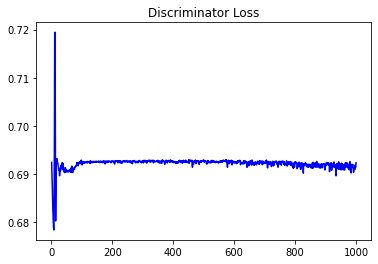

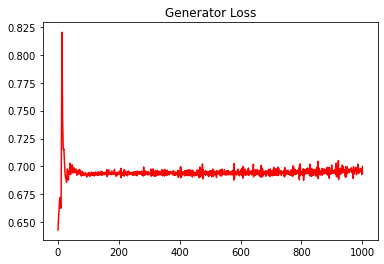

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14681954788049353


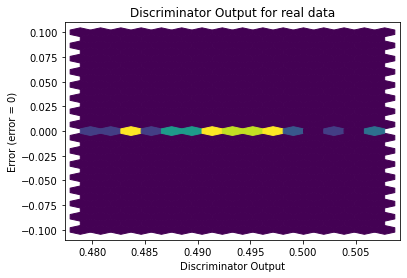

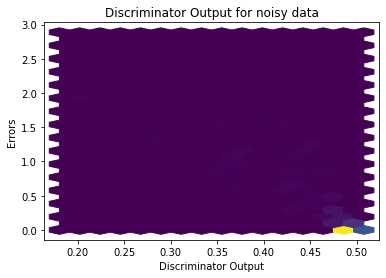

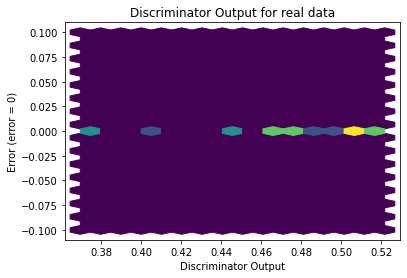

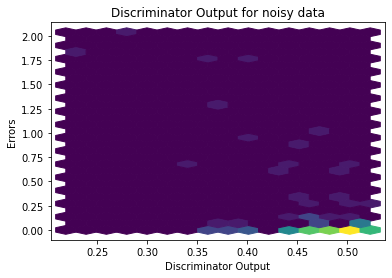

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


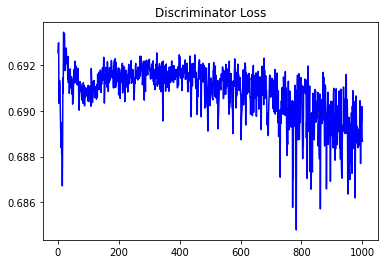

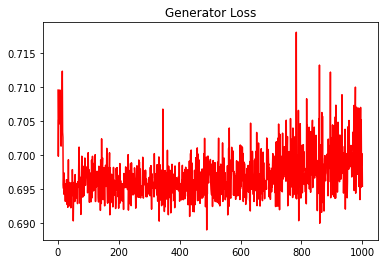

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.060298527503335635


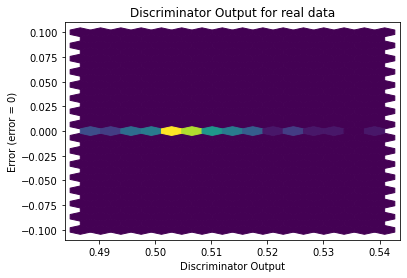

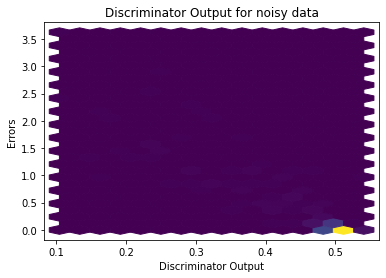

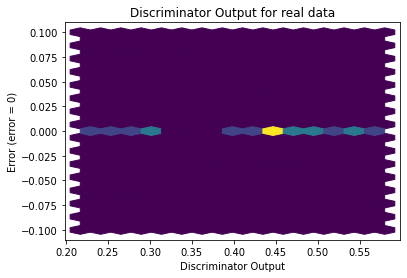

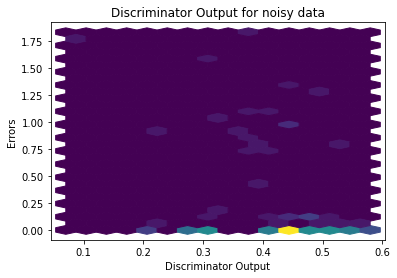

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2642]], requires_grad=True)
